In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [01:00<00:00, 41.8MB/s]
100% 2.29G/2.29G [01:00<00:00, 40.6MB/s]


In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.utils import img_to_array
import random

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [ ]:
train_images = "/content/chest_xray/train"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('/content/chest_xray/test',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 624 images belonging to 2 classes.


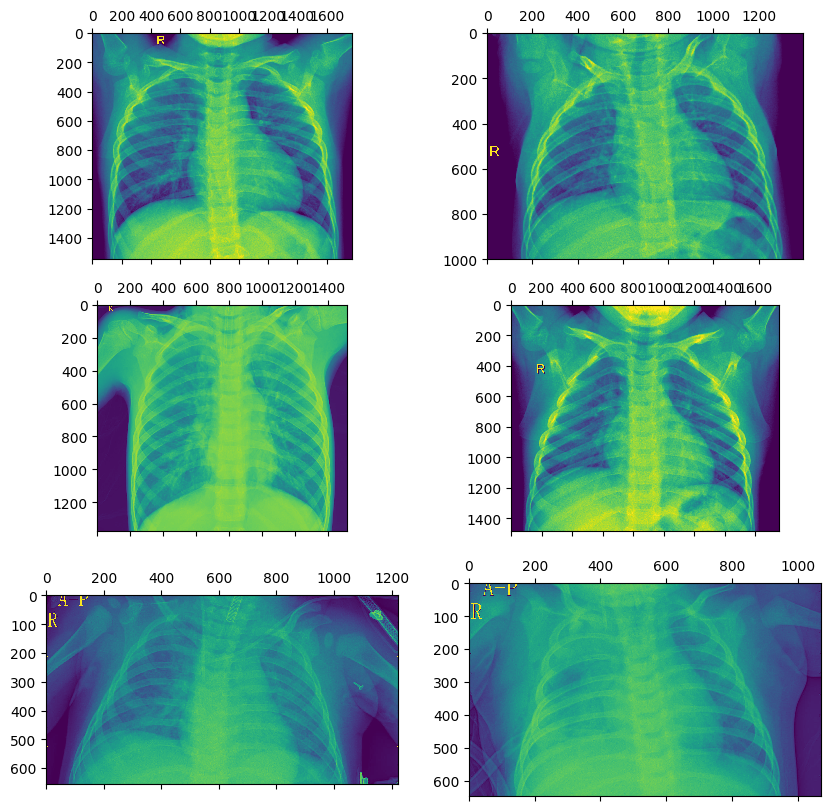

In [ ]:
#Pneumonia
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)

plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

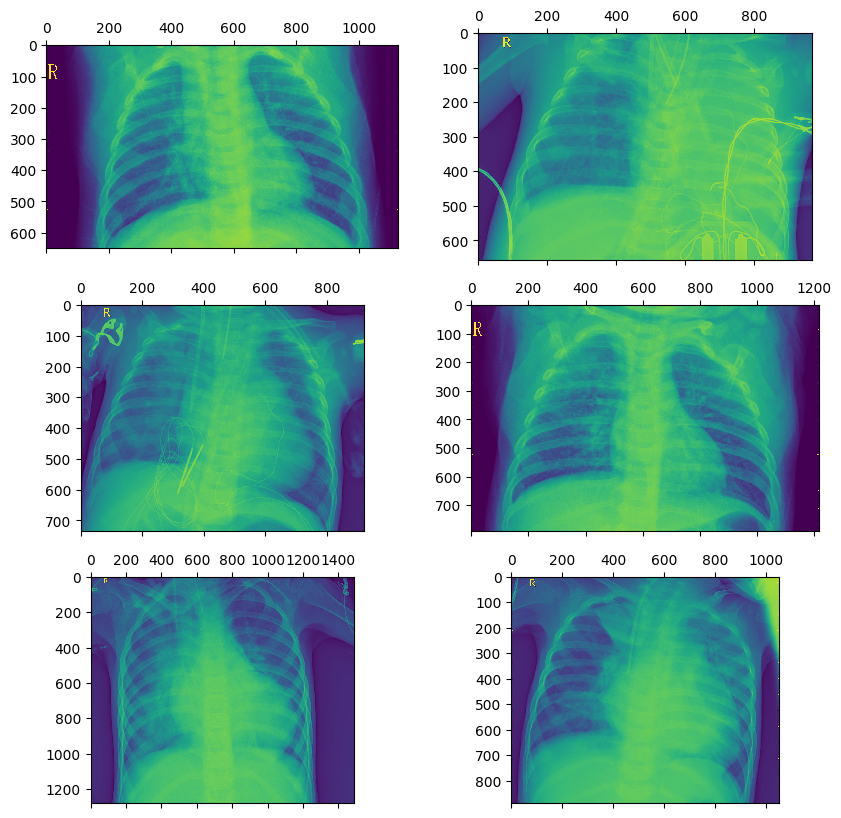

In [ ]:
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

In [ ]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator)

Epoch 1/50
41/41 [==============================] - 179s 4s/step - loss: 0.5695 - accuracy: 0.7339 - val_loss: 0.4933 - val_accuracy: 0.7772
Epoch 2/50
41/41 [==============================] - 159s 4s/step - loss: 0.3054 - accuracy: 0.8574 - val_loss: 0.5849 - val_accuracy: 0.7468
Epoch 3/50
41/41 [==============================] - 162s 4s/step - loss: 0.2216 - accuracy: 0.9078 - val_loss: 0.3770 - val_accuracy: 0.8381
Epoch 4/50
41/41 [==============================] - 154s 4s/step - loss: 0.1911 - accuracy: 0.9262 - val_loss: 0.2985 - val_accuracy: 0.8830
Epoch 5/50
41/41 [==============================] - 151s 4s/step - loss: 0.1681 - accuracy: 0.9350 - val_loss: 0.6687 - val_accuracy: 0.7292
Epoch 6/50
41/41 [==============================] - 154s 4s/step - loss: 0.2053 - accuracy: 0.9225 - val_loss: 0.2739 - val_accuracy: 0.8814
Epoch 7/50
41/41 [==============================] - 150s 4s/step - loss: 0.1606 - accuracy: 0.9379 - val_loss: 0.3141 - val_accuracy: 0.8862
Epoch 8/50
41

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


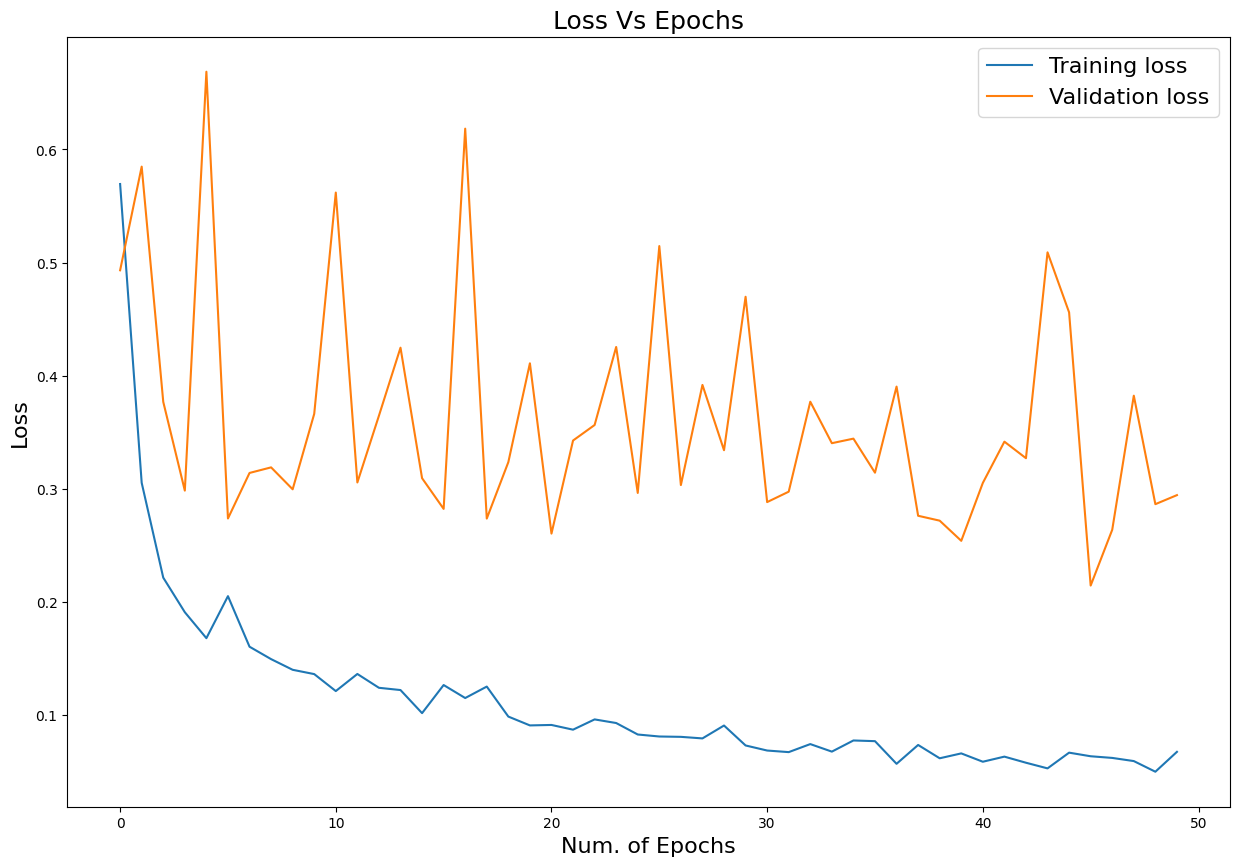

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


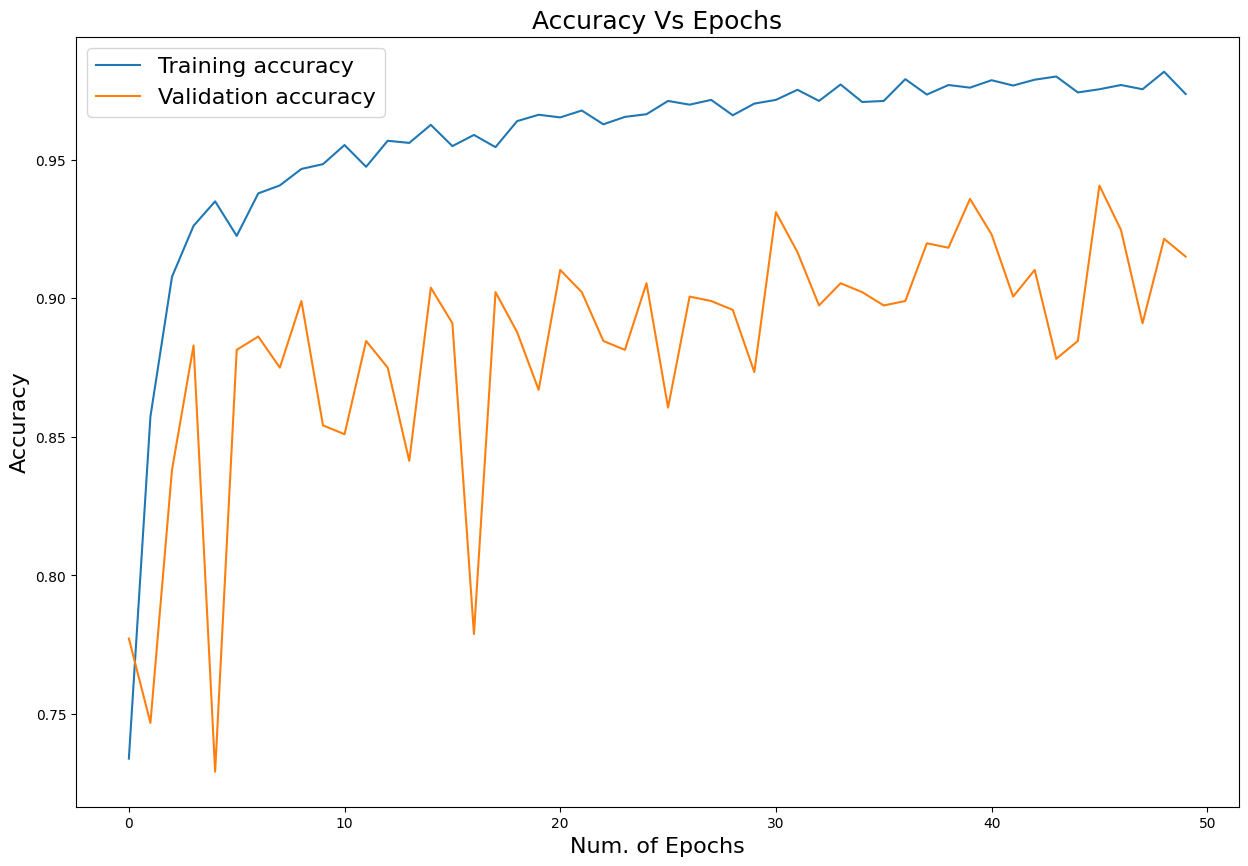

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/ColabNotebooks/Neumo.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
new_model = load_model("/content/drive/MyDrive/ColabNotebooks/Neumo.h5")

In [ ]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

eval_result = new_model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


<ipython-input-27-4cf309b7156c>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = new_model.evaluate_generator(test_generator, 624)


loss : 0.29453393816947937
accuracy : 0.9150640964508057


In [ ]:
img= cv2.imread('/content/chest_xray/test/NORMAL/NORMAL2-IM-0340-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
new_model.predict(img)

1/1 [==============================] - 0s 470ms/step


array([[0.03144779]], dtype=float32)

1/1 [==============================] - 0s 29ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

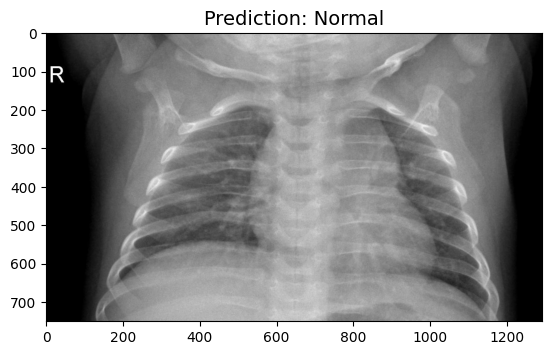

In [ ]:
prediction = new_model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [ ]:
img= cv2.imread('/content/chest_xray/test/NORMAL/NORMAL2-IM-0066-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
new_model.predict(img)

1/1 [==============================] - 0s 42ms/step


array([[0.9701558]], dtype=float32)

1/1 [==============================] - 0s 19ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

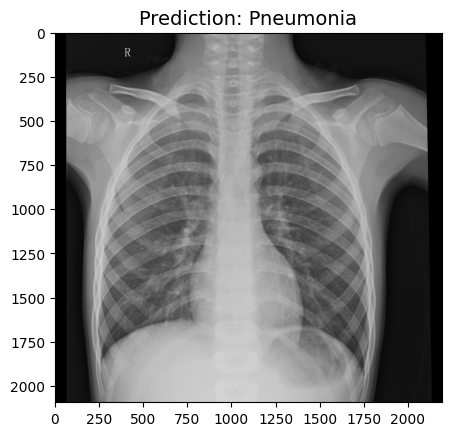

In [ ]:
prediction = new_model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [ ]:
img= cv2.imread('/content/chest_xray/test/PNEUMONIA/person101_bacteria_486.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
new_model.predict(img)

1/1 [==============================] - 0s 20ms/step


array([[0.9999541]], dtype=float32)